# 비동기 프로그래밍

- 비동기 프로그래밍은 단일 스레드 환경에서 여러 작업을 동시에 처리하기 위한 제어 방식이다.
- 호출된 함수가 즉시 결과를 반환하지 않더라도 프로세서가 다른 작업을 수행할 수 있도록 제어권을 유지한다.
- 입출력 작업 대기 시간 동안 자원의 유휴 상태를 방지하여 시스템 효율성을 높인다.

### 동기 프로그래밍과 비동기 프로그래밍의 비교

- 동기 프로그래밍은 순차적으로 명령을 실행하며, 앞선 작업이 완료될 때까지 다음 작업을 차단한다.
- 비동기 프로그래밍은 작업 완료 여부와 관계없이 다음 명령을 호출하며, 작업 완료 시점에 콜백이나 이벤트 루프를 통해 결과를 처리한다.

In [1]:
import time
import asyncio

# 동기 방식 함수 정의
def fetch_data_sync(name):
    print(f"데이터 조회 시작: {name}")
    time.sleep(2)  # 2초 동안 프로세스 차단
    print(f"데이터 조회 완료: {name}")


# 동기 실행 메커니즘 확인
def run_sync_example():
    start_time = time.time()
    fetch_data_sync("작업1")
    fetch_data_sync("작업2")
    end_time = time.time()
    print(f"동기 총 소요 시간: {end_time - start_time}초")

run_sync_example()


데이터 조회 시작: 작업1
데이터 조회 완료: 작업1
데이터 조회 시작: 작업2
데이터 조회 완료: 작업2
동기 총 소요 시간: 4.008500099182129초


In [2]:

# 비동기 방식 함수 정의
async def fetch_data_async(name):
    print(f"데이터 조회 시작: {name}")
    await asyncio.sleep(2)  # 2초 동안 제어권을 이벤트 루프에 반환
    print(f"데이터 조회 완료: {name}")

    
# 비동기 실행 메커니즘 확인
async def run_async_example():
    start_time = time.time()
    # 두 개의 비동기 작업을 동시에 예약
    await asyncio.gather(
        fetch_data_async("작업1"),
        fetch_data_async("작업2")
    )
    end_time = time.time()
    print(f"비동기 총 소요 시간: {end_time - start_time}초")

# 실행 코드
# 비동기 함수의 실행의 asyncio.run()으로 해야하지만, ipynb 또는 colab 환경에서는 이미 이벤트 루프가 돌아가고 있어 대신 await를 활용한다.
# asyncio.run(run_async_example())

await run_async_example()

데이터 조회 시작: 작업1
데이터 조회 시작: 작업2
데이터 조회 완료: 작업1
데이터 조회 완료: 작업2
비동기 총 소요 시간: 2.0017919540405273초


## 코루틴

- 코루틴은 실행을 일시 중단하고 재개할 수 있는 특수한 형태의 함수이다.
- 파이썬에서는 async def 예약어를 사용하여 정의하며, 호출 시 즉시 실행되지 않고 코루틴 객체를 반환한다.

In [3]:
import asyncio

async def simple_coroutine():
    return "코루틴 반환값"

# 코루틴 객체 생성
coro = simple_coroutine()
print(f"객체 유형: {type(coro)}")

# await 키워드를 통해 코루틴 실행 및 결과 추출

value = await coro 
# await를 만나야 실행 async를 준비만하고 실행
# 싹 다 끝나야 끝난거임
print(value)

객체 유형: <class 'coroutine'>
코루틴 반환값


## 이벤트 루프

- 이벤트 루프는 비동기 함수들을 관리하고 실행하는 중앙 제어 장치이다.
- 대기 중인 작업들을 모니터링하다가 작업이 완료되면 해당 지점부터 실행을 재개한다.

In [4]:
import asyncio

async def main_loop_task():
    loop = asyncio.get_running_loop()
    print(f"현재 실행 중인 이벤트 루프 정보: {loop}")

await main_loop_task()
# Jupyter 환경에서는 이미 이벤트 루프가 실행 중이므로 await로 바로 호출
# 일반 환경에서는 asyncio.run()으로 이벤트루프를 실행한다.

현재 실행 중인 이벤트 루프 정보: <_UnixSelectorEventLoop running=True closed=False debug=False>


## 대기 키워드

- await 키워드는 코루틴의 작업이 완료될 때까지 해당 코루틴의 실행을 일시 정지시킨다.
- 일시 정지된 동안 제어권은 이벤트 루프로 반환되어 다른 비동기 작업이 수행될 수 있다.


In [5]:
import asyncio

async def task_with_delay(seconds):
    print(f"{seconds}초 대기 작업 시작")
    await asyncio.sleep(seconds) # 비차단 대기 수행
    print(f"{seconds}초 대기 작업 종료")
    return seconds

async def execute_tasks():
    # await를 사용한 순차적 비동기 처리
    val1 = await task_with_delay(1)
    val2 = await task_with_delay(1)
    print(f"합계: {val1 + val2}")

await execute_tasks()

1초 대기 작업 시작
1초 대기 작업 종료
1초 대기 작업 시작
1초 대기 작업 종료
합계: 2


## 비동기 작업의 병렬 처리

- asyncio.gather는 여러 코루틴을 동시에 이벤트 루프에 등록하여 병렬적으로 실행한다.
- 모든 작업이 완료될 때까지 대기하며, 결과들을 리스트 형태로 반환한다.

In [8]:
import asyncio

async def fetch_url(url):
    print(f"{url} 요청 전송")
    await asyncio.sleep(2) # 네트워크 지연 상황 시뮬레이션
    return f"{url} 데이터"

async def main():
    urls = ["google.com", "naver.com", "daum.net"]
    
    # 여러 코루틴을 생성 후 gather에 전달
    results = await asyncio.gather(*(fetch_url(u) for u in urls))
    
    print(f"수집 결과: {results}")

await main()

google.com 요청 전송
naver.com 요청 전송
daum.net 요청 전송
수집 결과: ['google.com 데이터', 'naver.com 데이터', 'daum.net 데이터']


In [7]:

# 코루틴이여도 await를 반복해서 사용하면 동기처럼 실행된다.
async def main():
    urls = ["google.com", "naver.com", "daum.net"]
    
    results = [await fetch_url(u) for u in urls]
    
    print(f"수집 결과: {results}")

await main()

google.com 요청 전송
naver.com 요청 전송
daum.net 요청 전송
수집 결과: ['google.com 데이터', 'naver.com 데이터', 'daum.net 데이터']


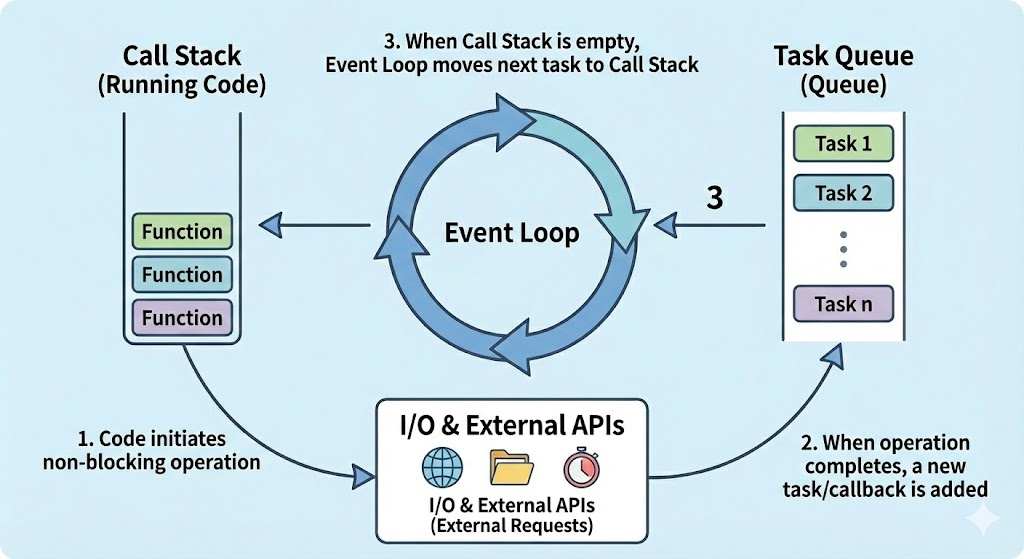